# ANN FOR NUMBER RECOGNITION

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential  # Change 'sequential' to 'Sequential'
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical,plot_model

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

from warnings import filterwarnings
filterwarnings("ignore")


In [2]:
# Loading the Mnist dataset

(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print("Training set size:",x_train.shape,y_train.shape)

Training set size: (60000, 28, 28) (60000,)


In [4]:
print("Training set size:",x_test.shape,y_test.shape)

Training set size: (10000, 28, 28) (10000,)


In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
#number of classes

num_labels=len(np.unique(y_train))
num_labels

10

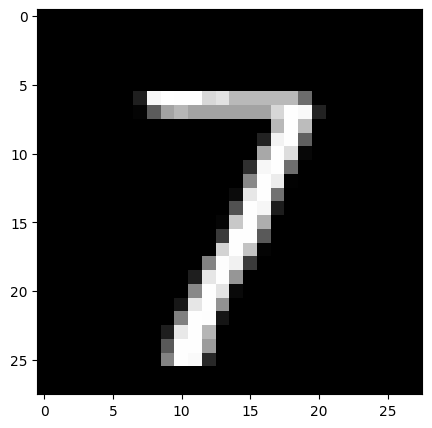

In [7]:
# showing examples from te dataset

plt.figure(figsize=(5,5))
plt.imshow(x_train[560],cmap="gray")

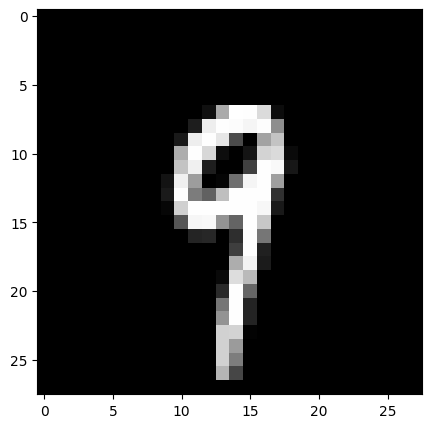

In [8]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[600],cmap="gray")

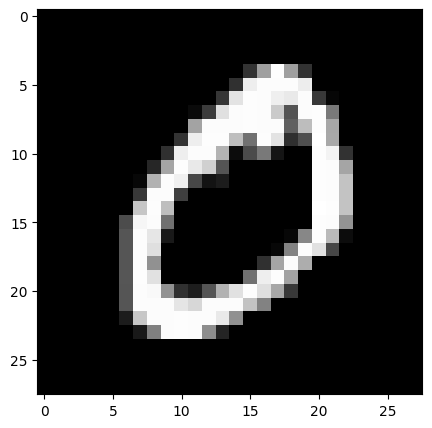

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[1],cmap="gray")

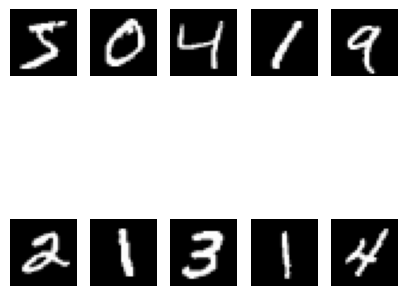

In [10]:
plt.figure(figsize=(5,5))
for i in range(0,10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.axis('off')

In [11]:
def visualize_img(data,num=10):
    plt.figure(figsize=(5,5))
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(data[i],cmap="gray")
        plt.axis("off")

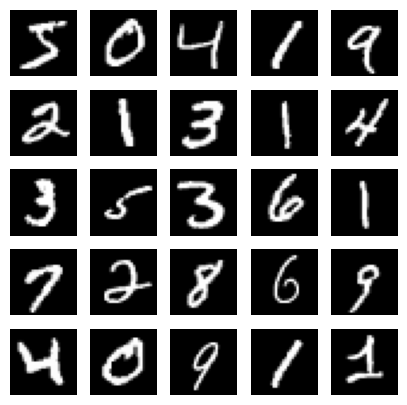

In [12]:
visualize_img(x_train,25)

In [13]:
def pixel_visualize(img):
    fig=plt.figure(figsize=(12,12))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")
    width,height=img.shape

    threshold =img.max()/2.5

    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y])), xy=(y,x),color="white" if img[x][y]<threshold else "black") #value[x][y],position,color,threshold condition


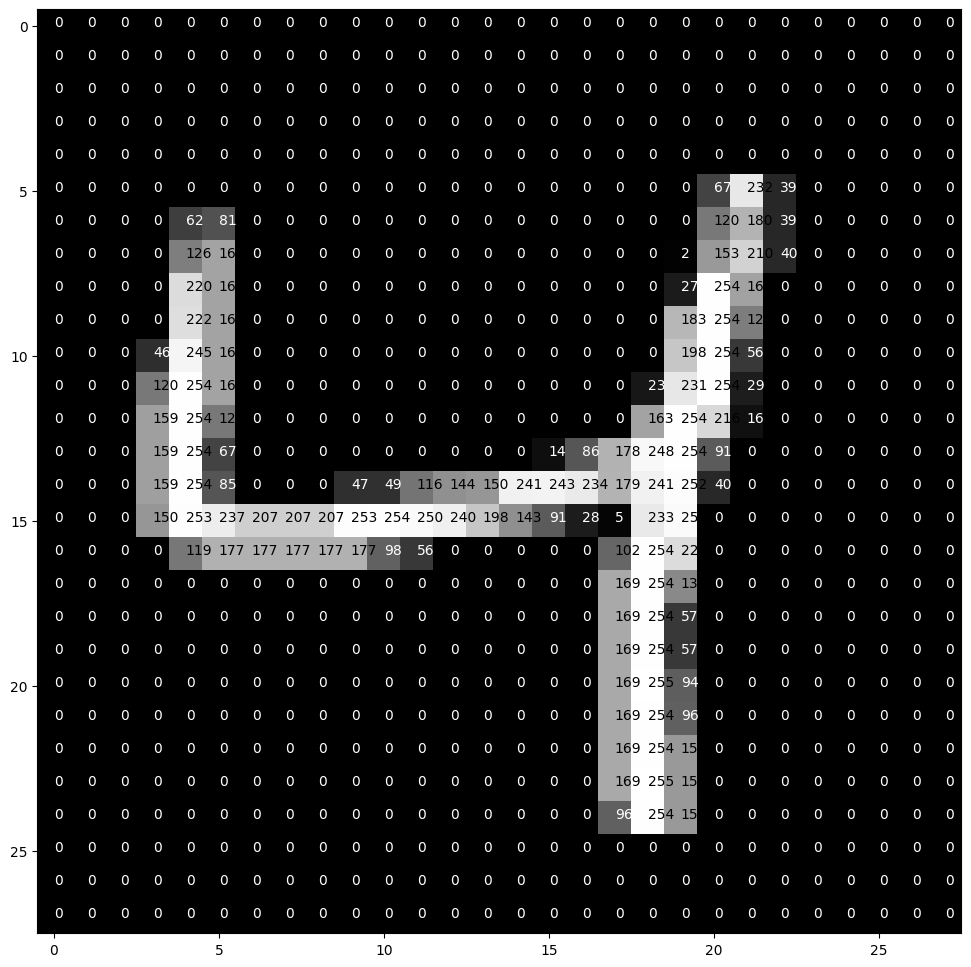

In [14]:
pixel_visualize(x_train[2])

# Data preparation

# Encoding for dependent variable

In [15]:
# before encoding
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [17]:
#below classes are expressed after encoding(one-hot encoding)

y_train[0:5]  # output based on this array([5, 0, 4, 1, 9], dtype=uint8)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

# reshaping

In [18]:
image_size=x_train.shape[1]
image_size

28

In [19]:
print(f"x_train:{x_train.shape}\n\nx_test size:{x_test.shape}")

x_train:(60000, 28, 28)

x_test size:(10000, 28, 28)


In [20]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [21]:
print(f"x_train size: {x_train.shape}\n\nx_test size: {x_test.shape}")

x_train size: (60000, 28, 28, 1)

x_test size: (10000, 28, 28, 1)


### Standardisation


In [22]:
x_train=x_train.astype("float32")/255 ## where 255 is max size/value of pixel
x_test=x_test.astype("float32")/255

In [23]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [24]:
x_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# MODELLING

## DEFINING NEURAL NETWOWRK ARCHITECTURE

In [25]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)), # making the data understandable
    Dense(units=128, activation="relu",name="layer1"),  # hidden layer
    Dense(units=num_labels, activation="softmax",name="output_layer")])

model.compile(loss="categorical_crossentropy",  # error evaluation metric ,
    optimizer="adam", # optimization algorithm to minimize the loss function
    metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#Model fit

model.fit(x_train,y_train,epochs=8,batch_size=128,
          validation_data=(x_test,y_test))

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8304 - loss: 0.6226 - precision: 0.9333 - recall: 0.6991 - val_accuracy: 0.9448 - val_loss: 0.1928 - val_precision: 0.9597 - val_recall: 0.9312
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9498 - loss: 0.1762 - precision: 0.9635 - recall: 0.9386 - val_accuracy: 0.9591 - val_loss: 0.1418 - val_precision: 0.9666 - val_recall: 0.9516
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9647 - loss: 0.1223 - precision: 0.9738 - recall: 0.9579 - val_accuracy: 0.9685 - val_loss: 0.1063 - val_precision: 0.9750 - val_recall: 0.9635
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9735 - loss: 0.0912 - precision: 0.9788 - recall: 0.9686 - val_accuracy: 0.9710 - val_loss: 0.0962 - val_precision: 0.9757 - val_recall: 0.9671
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9792 - loss: 0.0743 - precision: 0.9833 - recall: 0.9756 - val_accuracy: 0.9734 - val_loss: 0.0882 

# model evaluation

In [28]:
history=model.fit(x_train,
                  y_train,
                  epochs=8,
                  batch_size=128,
                  validation_data=(x_test,y_test))

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9903 - loss: 0.0359 - precision: 0.9917 - recall: 0.9887 - val_accuracy: 0.9783 - val_loss: 0.0742 - val_precision: 0.9802 - val_recall: 0.9769
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9922 - loss: 0.0291 - precision: 0.9938 - recall: 0.9906 - val_accuracy: 0.9771 - val_loss: 0.0766 - val_precision: 0.9797 - val_recall: 0.9751
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9934 - loss: 0.0257 - precision: 0.9947 - recall: 0.9922 - val_accuracy: 0.9799 - val_loss: 0.0709 - val_precision: 0.9819 - val_recall: 0.9789
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9951 - loss: 0.0205 - precision: 0.9957 - recall: 0.9942 - val_accuracy: 0.9782 - val_loss: 0.0748 - val_precision: 0.9797 - val_recall: 0.9768
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9956 - loss: 0.0183 - precision: 0.9963 - recall: 0.9950 - val_accuracy: 0.9791 - val_loss: 0.0728 

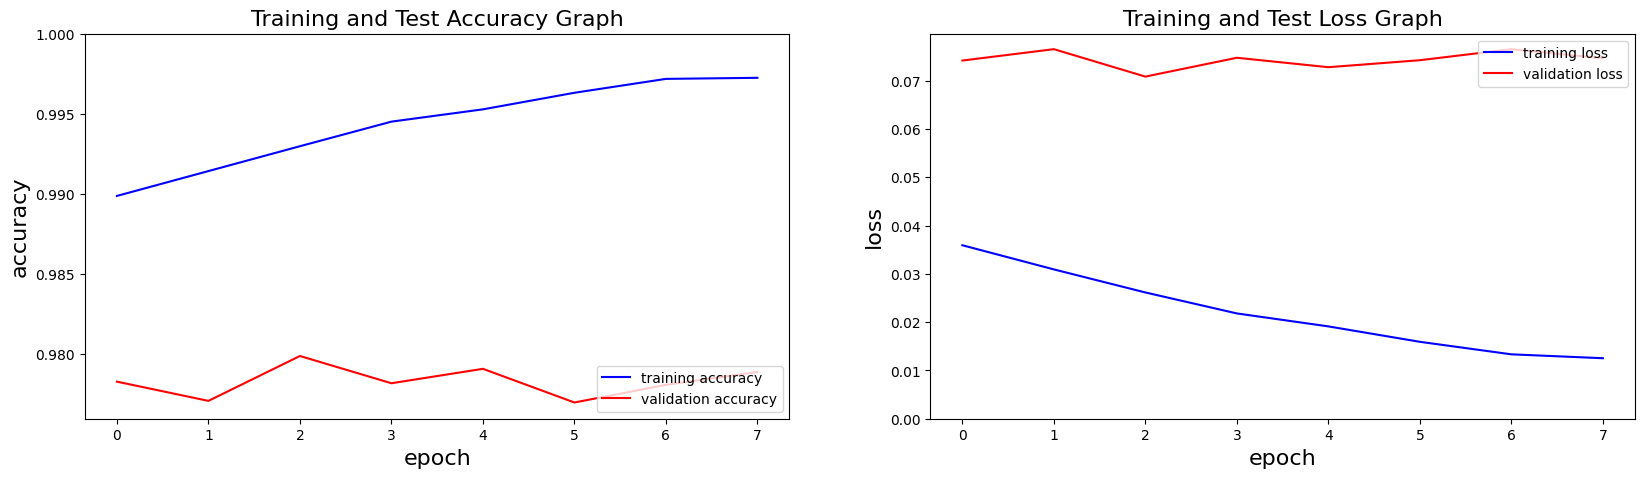

In [29]:
# Accuracy and loss charts

# Create a figure with two subplots
plt.figure(figsize=(20,5))

# Accuracy subplot
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],color='b',label="training accuracy")
plt.plot(history.history["val_accuracy"],color='r',label="validation accuracy")
plt.legend(loc="lower right")
plt.xlabel("epoch",fontsize=16)
plt.ylabel("accuracy",fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Test Accuracy Graph",fontsize=16)

# Loss subplot
plt.subplot(1,2,2)
plt.plot(history.history["loss"],color='b',label="training loss")
plt.plot(history.history["val_loss"],color='r',label="validation loss")
plt.legend(loc="upper right")
plt.xlabel("epoch",fontsize=16)
plt.ylabel("loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Test Loss Graph",fontsize=16)

# Show the plot
plt.show()

In [30]:
loss,precision,recall,acc=model.evaluate(x_test,y_test,verbose=False)
print(f"Test accuracy: {round(acc*100,2)}")
print(f"Test loss: {round(loss*100,2)}")
print(f"Test precision: {round(precision*100,2)}")
print(f"Test recall: {round(recall*100,2)}")

Test accuracy: 97.89
Test loss: 7.47
Test precision: 98.03
Test recall: 97.83


# prediction and visualization

In [31]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [32]:
y_pred_classes=np.argmax(y_pred,axis=1)

In [33]:
if len(y_test.shape)>1 and y_test.shape[1]!=1:
    y_test=np.argmax(y_test,axis=1)

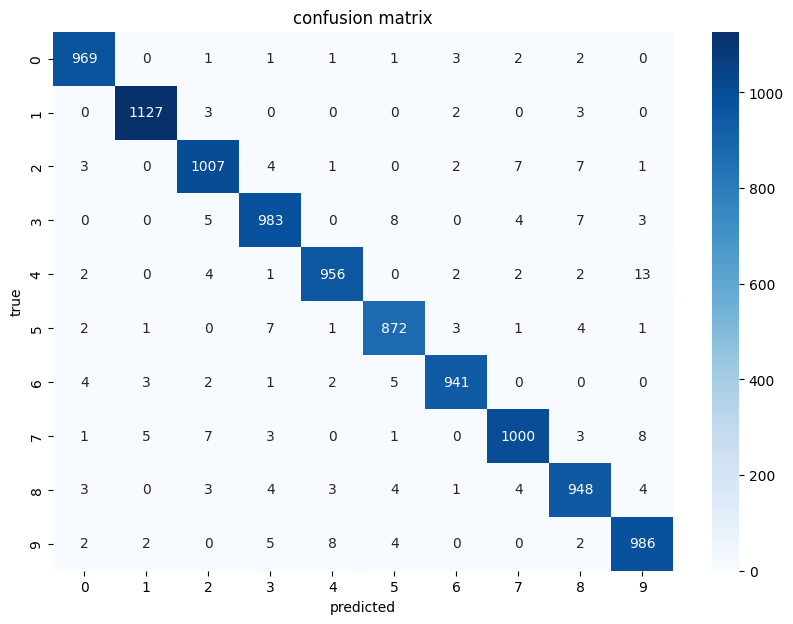

In [34]:
#confusion matrix

cm=confusion_matrix(y_test,y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("confusion matrix")
plt.show()

In [35]:
model.save("mnist_model.h5")

In [36]:
import random
random = random.randint(0,x_test.shape[0])

In [37]:
random

347

In [38]:
test_image=x_test[random]

In [39]:
print(y_test[random])

5


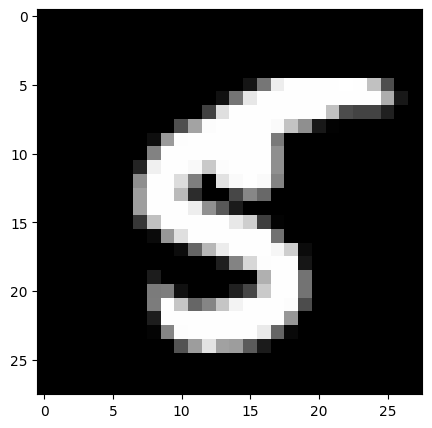

In [40]:
plt.figure(figsize=(5,5))
plt.imshow(test_image.reshape(28,28),cmap="gray")

In [41]:
test_data=x_test[random].reshape(1,28,28,1)

In [42]:
probability=model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [43]:
predict_classes=np.argmax(probability)

In [44]:
print(f"predicted class: {predict_classes}\nProbability value of predicted class:{np.max(probability,axis=-1)[0]}\nprobability values of other classes:{probability}")

predicted class: 5
Probability value of predicted class:0.9992510676383972
probability values of other classes:[[3.6548615e-13 9.1221770e-12 3.4656470e-15 8.4282048e-09 8.8720671e-18
  9.9925107e-01 1.1526792e-10 1.4006586e-16 7.4715179e-04 1.8046292e-06]]
